In [1]:
!pip install pandas numpy

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.5 MB 13.5 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/11.5 MB 12.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.5 MB 12.0 MB/s eta 0:00:01
   ----- ---------------------------------- 1.7/11.5 MB 11.8 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.5 MB 9.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/11.5 MB 9.7 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.5 MB 10.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.7/11.5 MB 10.3 MB/s eta 0:00:01
   -------------- ------------------------- 4.2/11.5 MB 10.3 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.5 MB 10.6 MB/s eta 0:00:01
   ----


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [3]:
data_df = pd.read_csv('../data/Renewable.csv')

In [4]:
data_df

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [5]:
data_df.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')

In [6]:
data_df.head()


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy delta[Wh],196776.0,573.008228,1044.824047,0.0,0.0,0.00,577.00,5020.00
GHI,196776.0,32.596538,52.172018,0.0,0.0,1.60,46.80,229.20
temp,196776.0,9.790521,7.995428,-16.6,3.6,9.30,15.70,35.80
pressure,196776.0,1015.292780,9.585773,977.0,1010.0,1016.00,1021.00,1047.00
humidity,196776.0,79.810566,15.604459,22.0,70.0,84.00,92.00,100.00
wind_speed,196776.0,3.937746,1.821694,0.0,2.6,3.70,5.00,14.30
rain_1h,196776.0,0.066035,0.278913,0.0,0.0,0.00,0.00,8.09
snow_1h,196776.0,0.007148,0.069710,0.0,0.0,0.00,0.00,2.82
clouds_all,196776.0,65.974387,36.628593,0.0,34.0,82.00,100.00,100.00
isSun,196776.0,0.519962,0.499603,0.0,0.0,1.00,1.00,1.00


In [9]:
data_df.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [10]:
#for duplicates
data_df.nunique()

Time                      196776
Energy delta[Wh]            4556
GHI                         2277
temp                         503
pressure                      71
humidity                      79
wind_speed                   136
rain_1h                      311
snow_1h                      129
clouds_all                   101
isSun                          2
sunlightTime                  69
dayLength                     39
SunlightTime/daylength       101
weather_type                   5
hour                          24
month                         12
dtype: int64

In [11]:
data_df.isna().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [13]:
label_encoder = LabelEncoder()
data_df['weather_type_encoded'] = label_encoder.fit_transform(data_df['weather_type'])


In [14]:
data_df.drop(['Time', 'weather_type'],  axis = 1 , inplace= True)

In [15]:
numeric_df = data_df.select_dtypes(include=[float, int])

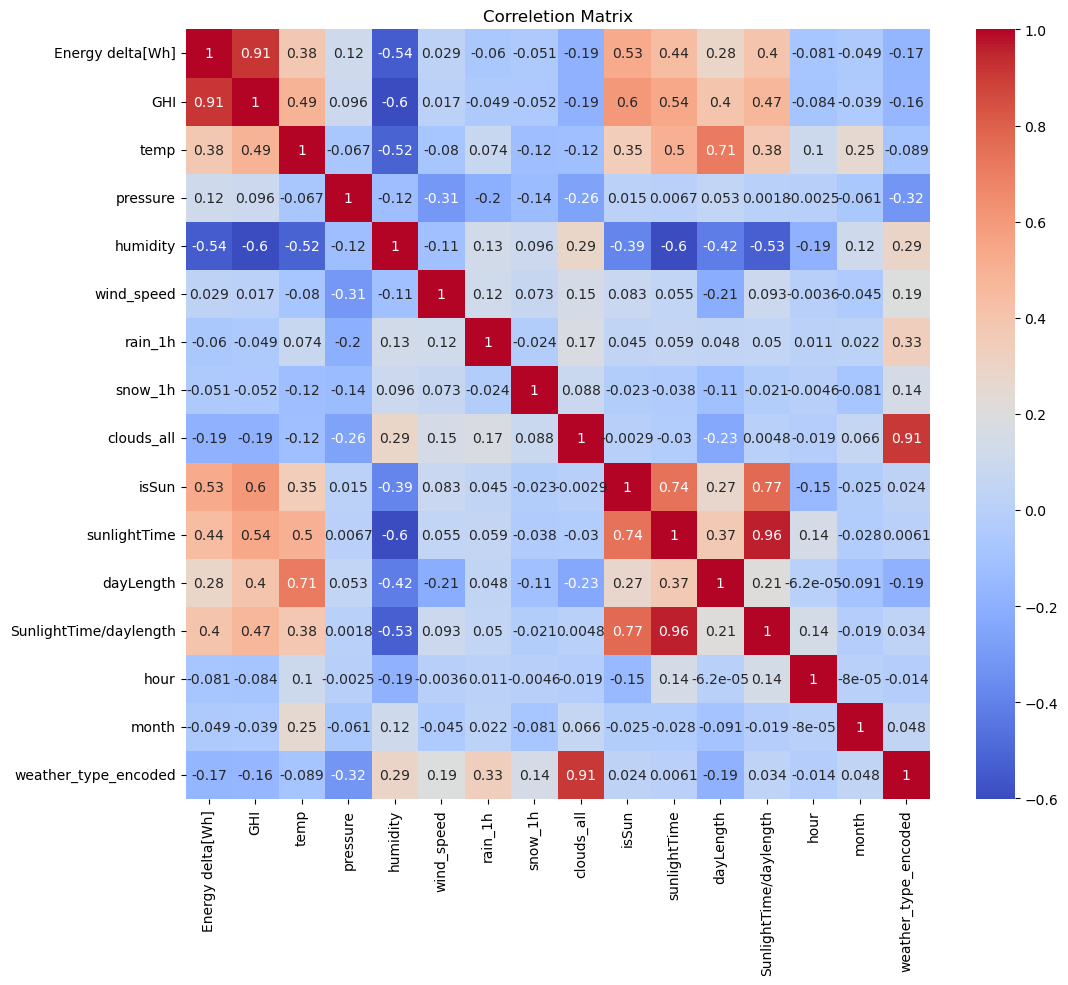

In [16]:
correlation_matrix= numeric_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correletion Matrix')
plt.show()


In [32]:
import pandas as pd

def create_lagged_features(df, target_col, n_lags):
   
    df = df.copy()  # Create a copy to avoid modifying the original DataFrame

    # Create lagged features
    for lag in range(1, n_lags + 1):
        lagged_col_name = f'{target_col}_lag_{lag}'  
        df[lagged_col_name] = df[target_col].shift(lag)  

    df.dropna(inplace=True)

    return df


# Print original data
print("Original DataFrame:")
print(df)

# Create lagged features
df_with_lags = create_lagged_features(df, target_col='Energy delta[Wh]', n_lags=3)

# Print DataFrame with lagged features
print("\nDataFrame with Lagged Features:")
print(df_with_lags)



Original DataFrame:
        Time  Energy delta[Wh]
0 2023-01-01               100
1 2023-01-02               150
2 2023-01-03               200
3 2023-01-04               250
4 2023-01-05               300
5 2023-01-06               350
6 2023-01-07               400
7 2023-01-08               450
8 2023-01-09               500
9 2023-01-10               550

DataFrame with Lagged Features:
        Time  Energy delta[Wh]  Energy delta[Wh]_lag_1  \
3 2023-01-04               250                   200.0   
4 2023-01-05               300                   250.0   
5 2023-01-06               350                   300.0   
6 2023-01-07               400                   350.0   
7 2023-01-08               450                   400.0   
8 2023-01-09               500                   450.0   
9 2023-01-10               550                   500.0   

   Energy delta[Wh]_lag_2  Energy delta[Wh]_lag_3  
3                   150.0                   100.0  
4                   200.0            

In [35]:
X = data_df.drop('Energy delta[Wh]', axis=1)
y = data_df['Energy delta[Wh]']

In [37]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.2 , random_state=42 )

In [43]:
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

In [45]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

model = xgb.train(params,train_data, num_boost_round=100)

y_pred = model.predict(test_data)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 285.31


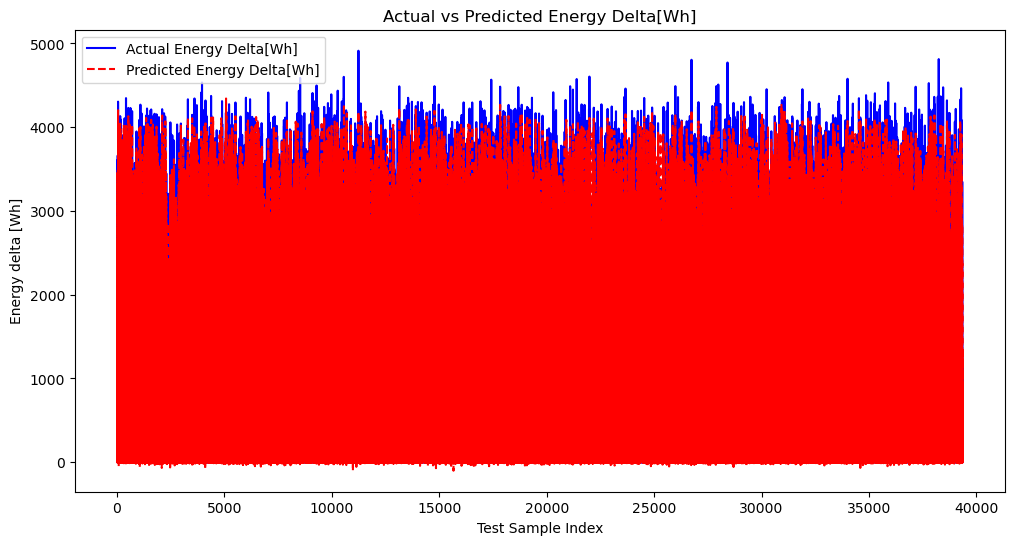

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Energy Delta[Wh]', color='blue')
plt.plot(y_pred, label='Predicted Energy Delta[Wh]', color='red', linestyle='--')
plt.title('Actual vs Predicted Energy Delta[Wh]')
plt.xlabel('Test Sample Index')
plt.ylabel('Energy delta [Wh]')
plt.legend()
plt.show()

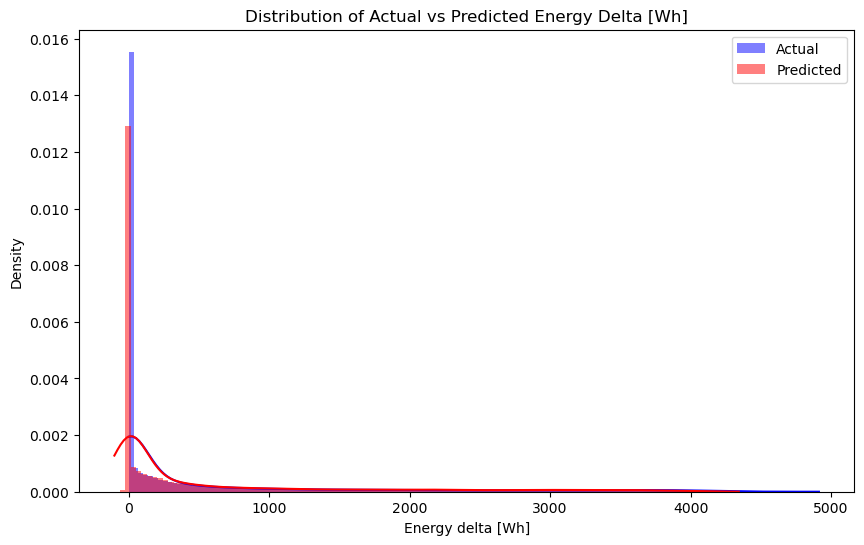

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred, color='red', label='Predicted', kde=True, stat="density", linewidth=0)

# Add title and labels
plt.title('Distribution of Actual vs Predicted Energy Delta [Wh]')
plt.xlabel('Energy delta [Wh]')
plt.ylabel('Density')
plt.legend()
